In [1]:
import numpy as np
from PIL import Image

## Resize

Using Pillow, we can resize an image to a given (height, width).

In [2]:
impath = 'images/segment-12212767626682531382_2100_150_2120_150_with_camera_labels_48.png'

In [3]:
img = Image.open(impath)
print(f'The image size is {img.size}')

The image size is (1920, 1280)


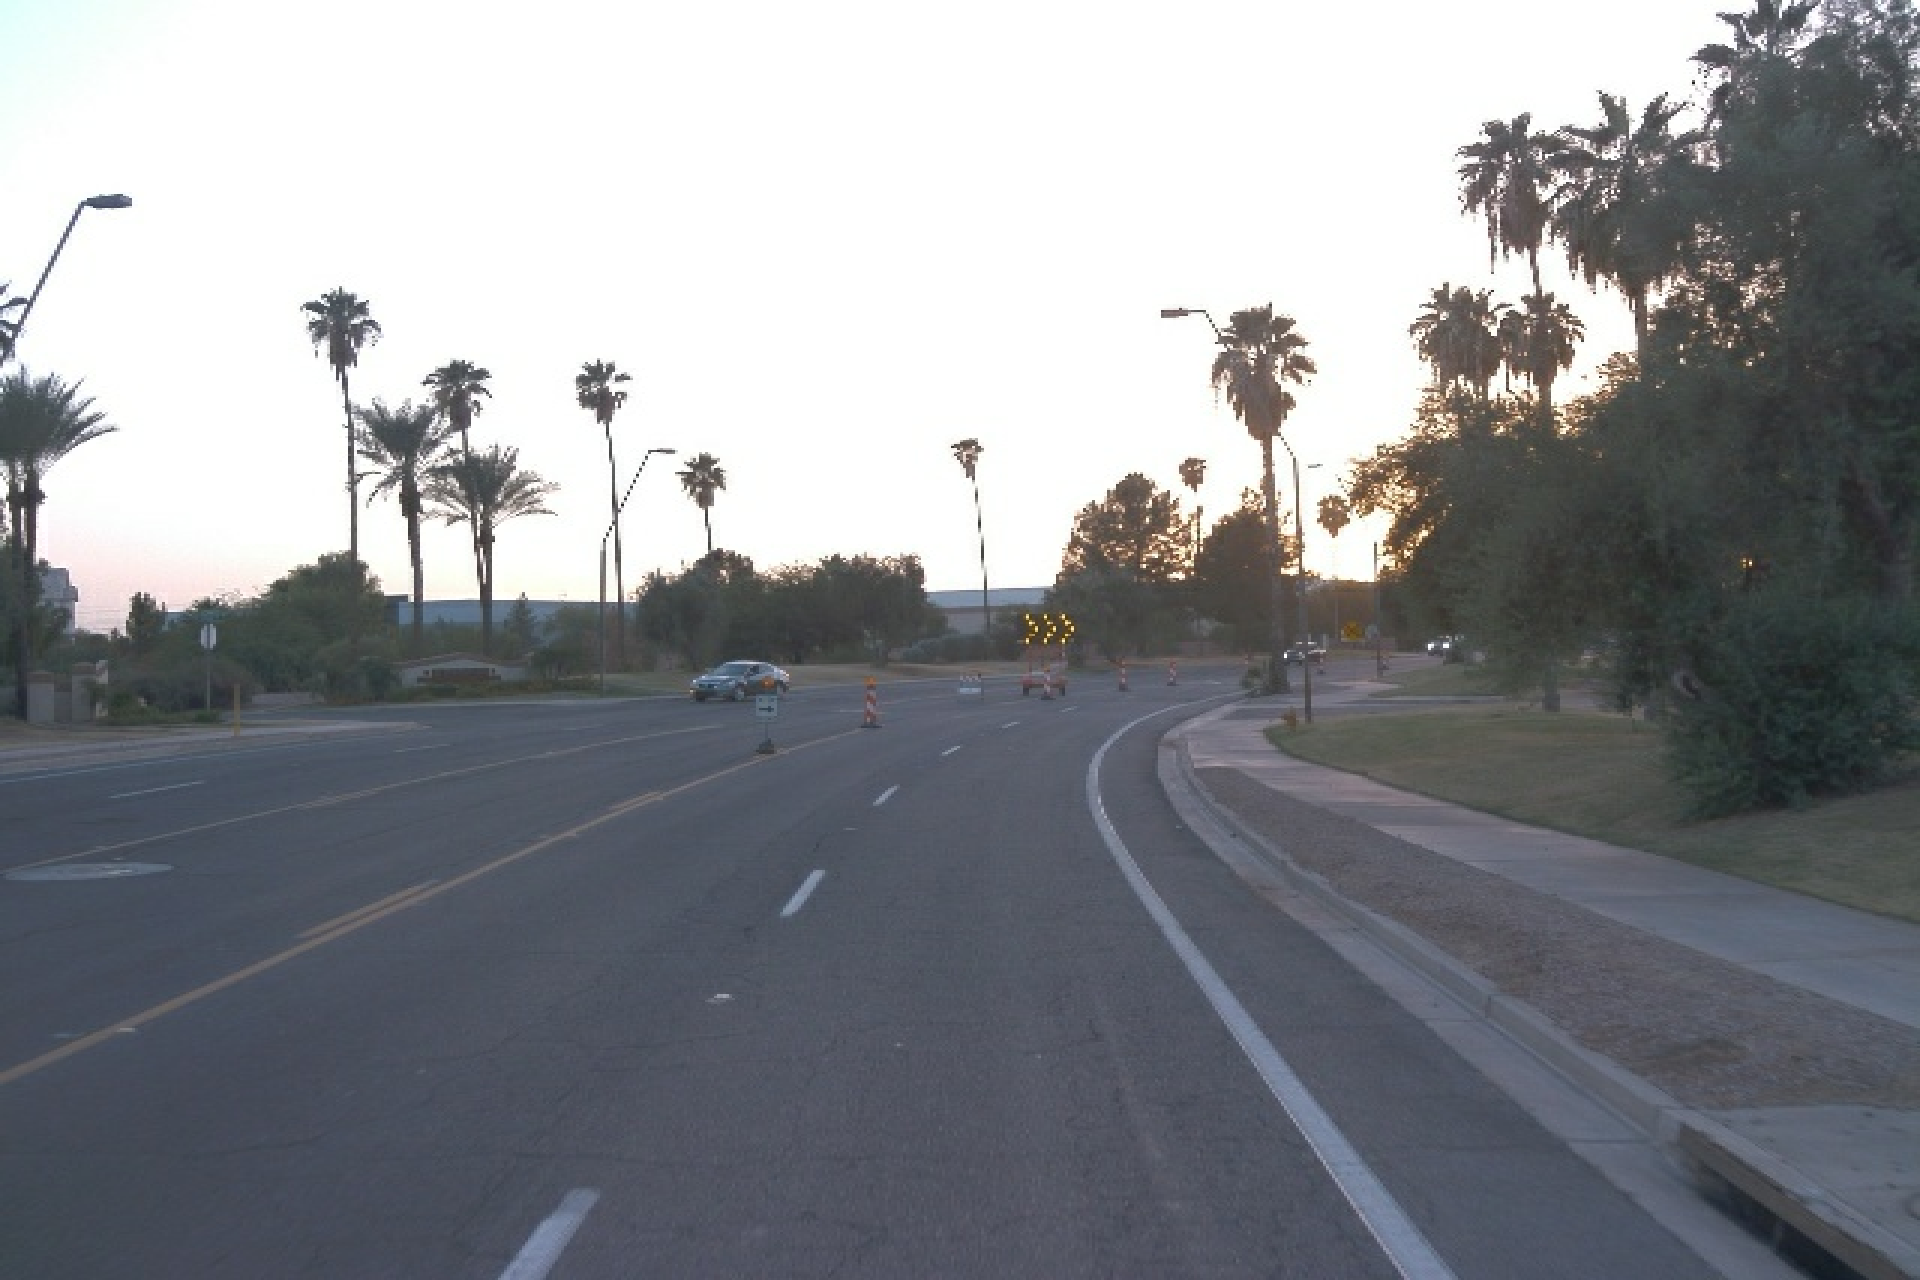

In [6]:
img

In [7]:
img_resized = img.resize((960, 640))
print(f'The image size is {img_resized.size}')

The image size is (960, 640)


## Affine transformation

An affine transformation is a **geometric transformation that preserves lines and parallelism** (but not necessarily distances and angles)



### Resizing

Resizing is a specific type of affine transformation. We can replicate the result by using the following transformation matrix:

$$
\left(\begin{array}{ccc} 
c_{x} & 0 & 0\\
0 & c_{y} & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 

In Pillow, we can use $c_{x} = 0.5$ and $c_{y} = 0.5$ to divide each dimension of the image by 2.


In [8]:
trans_matrix = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)

In [9]:
im_trans = img.transform((960, 640), method=Image.AFFINE, data=trans_inv.flatten())
print(f'The image size is {im_trans.size}')

The image size is (960, 640)


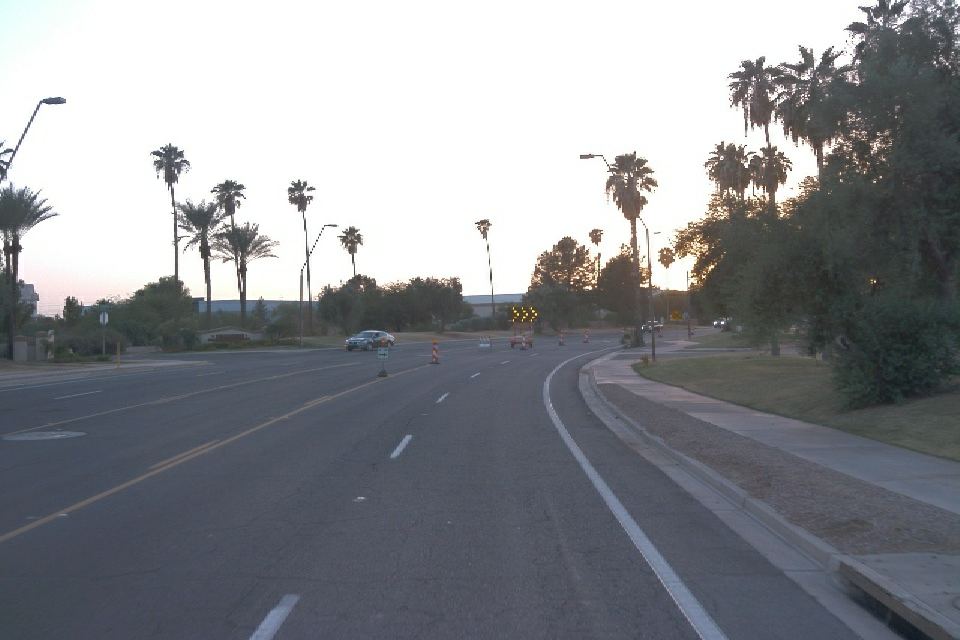

In [10]:
im_trans

### Translation

We can use the same function to perform rotation

$$
\left(\begin{array}{ccc} 
1 & 0 & t_{x}\\
0 & 1 & t_{y}\\
0 & 0 & 1\\
\end{array}\right)
$$ 

For example, we are going to translate the image by 200 pixels right and 100 pixels down respectively. We will use $t_{x}=200$ and  $t_{y}=100$

In [11]:
trans_matrix = np.array([[1, 0, 200], [0, 1, 100], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)

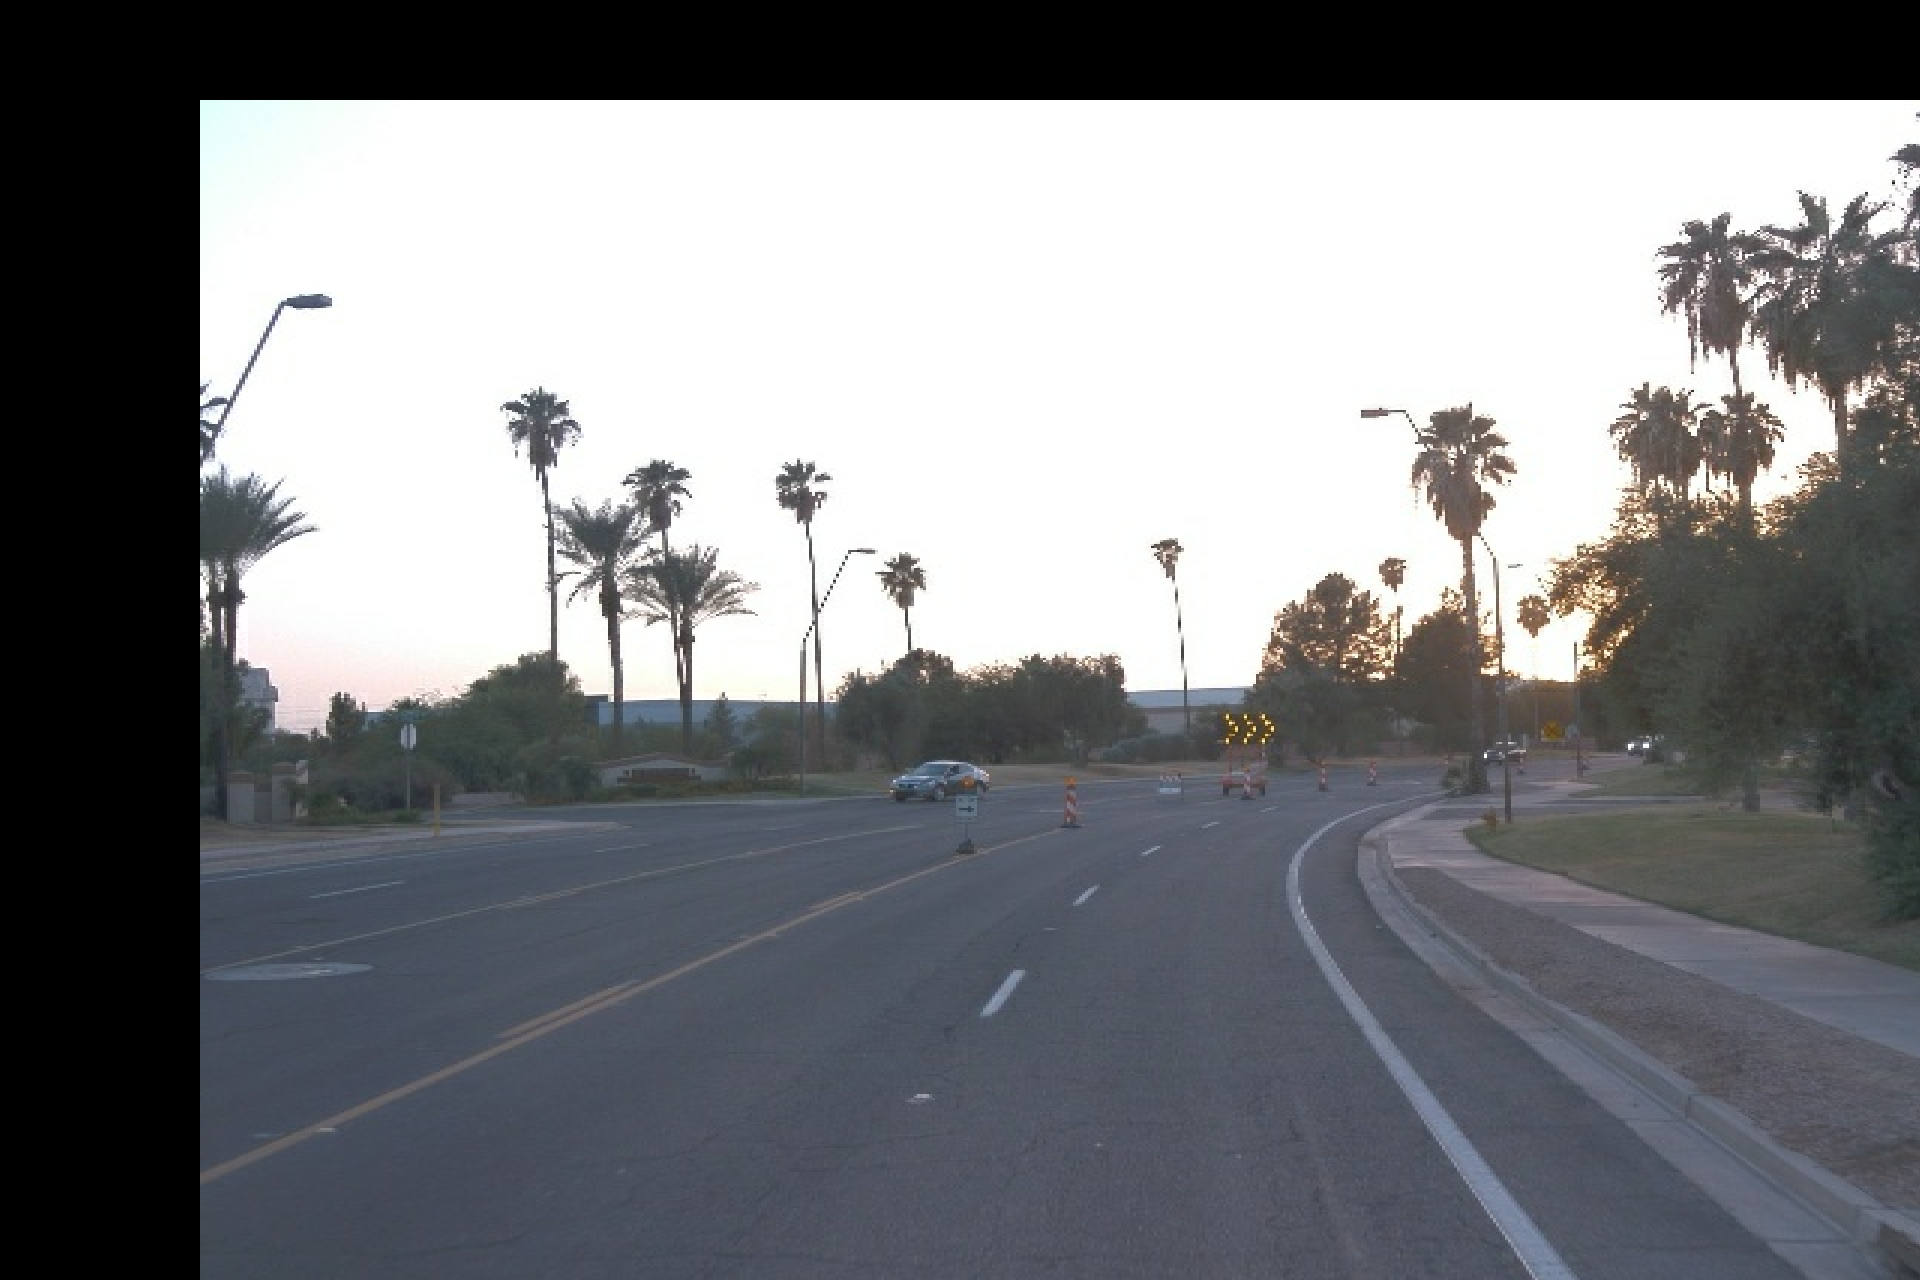

In [12]:
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())

### Shear

We can use the same function to perform horizontal or vertical shearing:

$$
\left(\begin{array}{ccc} 
1 & s_{x} & 0\\
s_{y} & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 

In [13]:
trans_matrix = np.array([[1, 0.1, 0], [0, 1, 0], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)

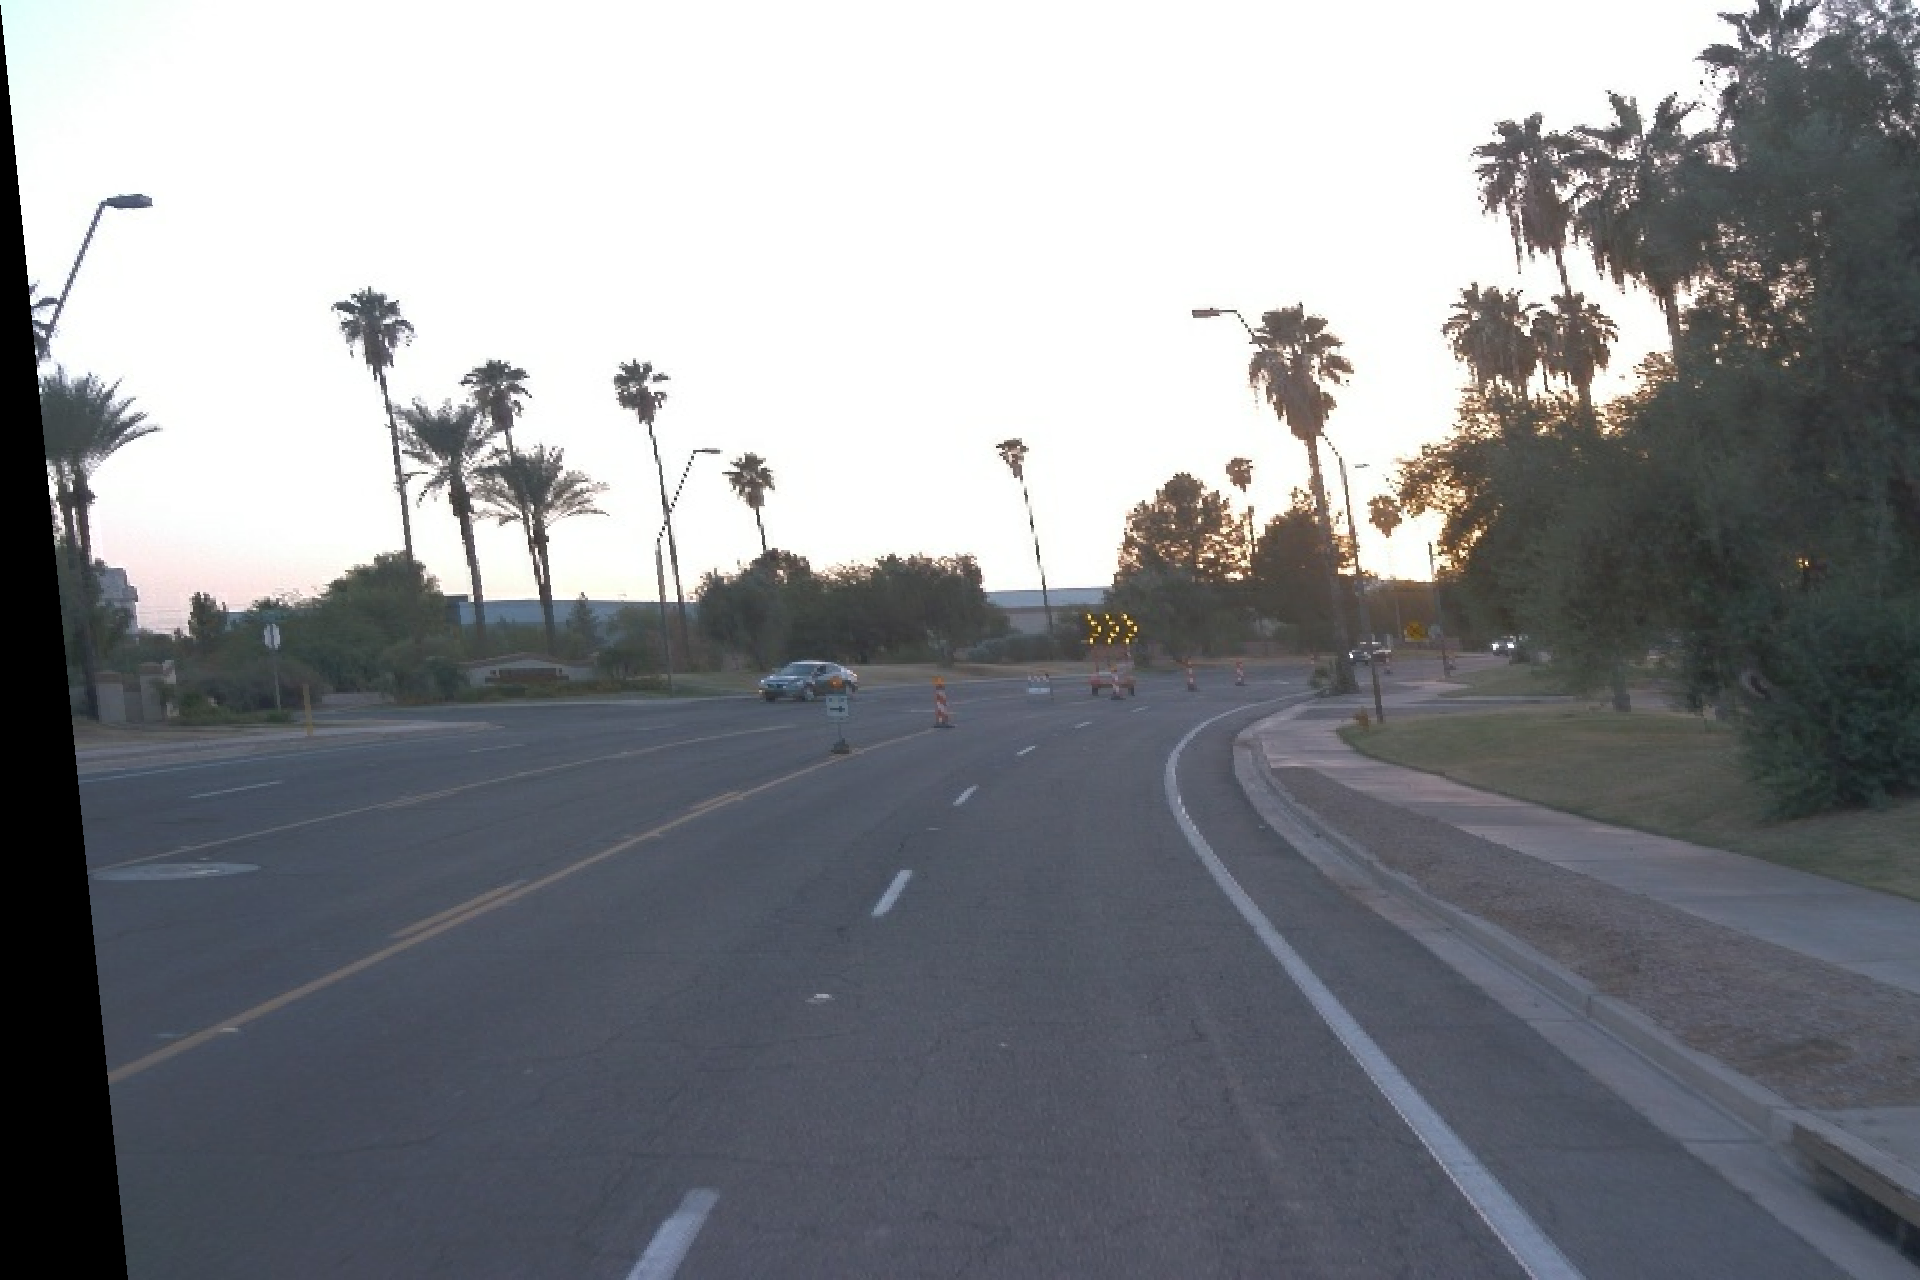

In [14]:
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())

### Combination

In [15]:
translation = np.array([[1, 0, 200], [0, 1, 100], [0, 0, 1]])
shearing = np.array([[1, 0.1, 0], [0, 1, 0], [0, 0, 1]])
trans_matrix = translation @ shearing
trans_inv = np.linalg.inv(trans_matrix)

In [ ]:
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())